In [ ]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Задачи проекта:**
- Изучить данные, провести предварительный анализ
- Построить RFM-сегментацию пользователей. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

## Изучаем и подготавливаем данные

In [ ]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Na в некоторых столбцах, вероятно, означает, что не все заказы были подтверждены, отправлены или доставлены

In [ ]:
#меняем тип данных
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [ ]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
#меняем тип данных
items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)

In [ ]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## **RFM-сегментация пользователей. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.**

Создадим датасет с покупками пользователей и отберем только нужные нам столбцы. Покупка - заказ с фиксированным временем оплаты.

In [ ]:
#создаем отдельный датафрейм с оплаченными заказами
purchases = orders.query('order_purchase_timestamp != ""')
#объединяем полученный датафрейм с датафреймом с инфой о клиентах
customers_purchases = customers.merge(purchases, on = 'customer_id')
#объединяем  с датасетом items для дальнейшего расчета метрик
rfm_analysis = customers_purchases.merge(items, on = 'order_id')

In [ ]:
#отберем только нужные колонки
rfm_analysis.columns
rfm_analysis = rfm_analysis[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']]

In [ ]:
rfm_analysis.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


In [ ]:
#посмотрим, какой период охватывает датасет
(rfm_analysis.order_purchase_timestamp.min(), rfm_analysis.order_purchase_timestamp.max())

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-09-03 09:06:57'))

Данные охватывают период за 2 года

Приступим к расчету метрик

R - время от последней покупки пользователя до текущей даты, для расчета данной метрики необходимо указать текущую дату, от которой будем вести отсчет. За текущую дату возьмем максимальный order_purchase_timestamp + 1 день


In [ ]:
today = rfm_analysis.order_purchase_timestamp.max() + dt.timedelta(1)
today

Timestamp('2018-09-04 09:06:57')

Посчитаем разницу в днях между датой заказа и today - это и будет значение R. Добавим соотвествующий столбец

In [ ]:
rfm_analysis['R'] = (today - rfm_analysis.order_purchase_timestamp).dt.days

In [ ]:
rfm_analysis = rfm_analysis.groupby('customer_unique_id', as_index = False)\
    .agg({'R' : 'min', #считаем минимальное значение R (метрика recency)
         'order_id' : 'nunique', #считаем кол-во заказов (метрика frequency)
          ##считаем сумму заказов (метрика monetary)
         'price' : 'sum'}) \
    .rename(columns = {'order_id' : 'F', 'price' : 'M'})
rfm_analysis.head()

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


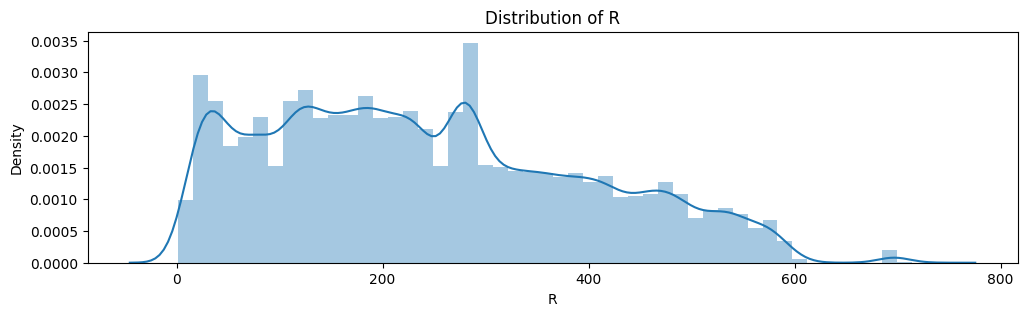

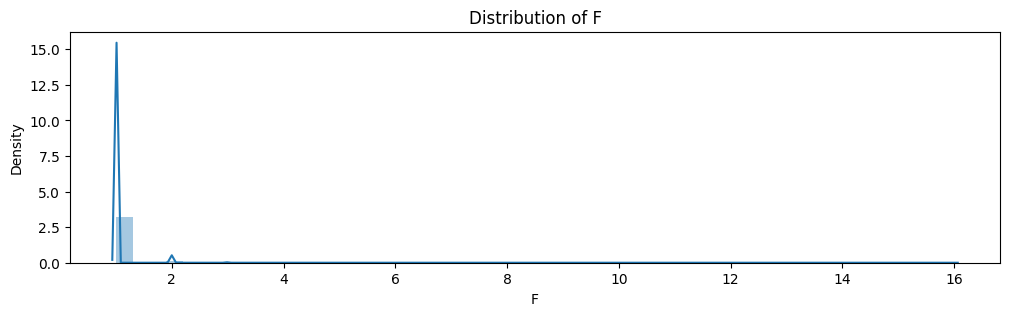

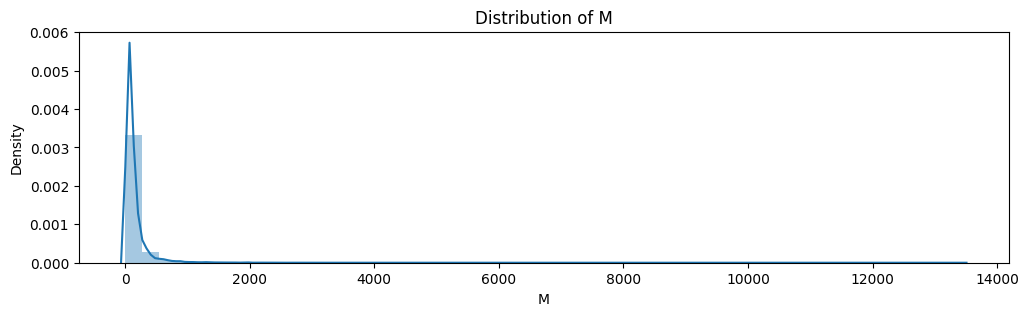

In [ ]:
#визуализируем распределение метрик
colnames = ['R', 'F', 'M']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm_analysis[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

Определяем диапазоны

In [ ]:
#получаем квантили для каждого параметра
quintiles = rfm_analysis[['R', 'F', 'M']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [ ]:
#присвоим ранги для метрики Recency (чем меньше - тем лучше)
def r_score(x):
    if x <= quintiles['R'][.2]:
        return 5
    elif x <= quintiles['R'][.4]:
        return 4
    elif x <= quintiles['R'][.6]:
        return 3
    elif x <= quintiles['R'][.8]:
        return 2
    else:
        return 1

Как мы видим, с метрикой Frequency что-то пошло не так, все квантили равны 1. Вернемся к этой метрике позже.

In [ ]:
 #присвоим ранги для метрики Monetary (чем больше - тем лучше)
def m_score(x):
    if x <= quintiles['M'][.2]:
        return 1
    elif x <= quintiles['M'][.4]:
        return 2
    elif x <= quintiles['M'][.6]:
        return 3
    elif x <= quintiles['M'][.8]:
        return 4
    else:
        return 5

In [ ]:
#вернемся к метрике Frequency. Рассмотрим, какие значения она принимает
rfm_analysis.F.value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: F, dtype: int64

Мы видим, что в основном покупки совершают 1 раз, поэтому деление на квантили в нашей ситуации нам не подходит. Зададим диапазоны вручную:

[1;3] покупок - 1 ///
[4;6] - 2 ///
[7;12] - 3 ///
[13;20] - 4 ///
[21;24] - 5

In [ ]:
#присвоим ранги для метрики Frequency
def f_score(x):
    if x >= 1 and x <= 3:
        return 1
    elif x >= 4 and x <= 6:
        return 2
    elif x >= 7 and x <= 12:
        return 3
    elif x >= 13 and x <= 20:
        return 4
    else:
        return 5

In [ ]:
#применяем функции к столбцам
rfm_analysis['R'] = rfm_analysis.R.apply(lambda x: r_score(x))
rfm_analysis['F'] = rfm_analysis.F.apply(lambda x: f_score(x))
rfm_analysis['M'] = rfm_analysis.M.apply(lambda x: m_score(x))

In [ ]:
#добавляем столбец со всеми показателями RFM
rfm_analysis['RFM'] = rfm_analysis.R.map(str) + rfm_analysis.F.map(str) + rfm_analysis.M.map(str)

In [ ]:
rfm_analysis.head()

,customer_unique_id,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,411
2,0000f46a3911fa3c0805444483337064,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2,1,5,215


Сегменты:
- R(5) F[1-5] M[4-5]: *Чемпионы* (покупали недавно, заказывают часто и тратят больше всего)
- R[4-5] F[1-5] M[3-4]: *Постоянные* (Стабильно покупающие клиенты; часть из них может стать чемпионами)
- R[4-5] F[1-5] M[2-3]: *Потенциальные постоянные* (Клиенты, которым немного не хватает частоты/суммы покупок, чтобы стать постоянными)
- R[4-5] F[1-2] M[1-5]: *Новые* (Купили что-то в первый раз, либо в первый раз за долгое время)
- R[4-5] F[1-4] M[1-5]: *Перспективные* (Купили что-то недавно на большую сумму, покупки нерегулярные)
- R[3-4] F[1-5] M[4-5]: *Требуют внимания* (Покупают периодически на большие суммы, давно не покупали)
- R(3) F[1-2] M[1-3]: *Почти уснули* (Клиенты в этом сегменте не совершали покупки в течение относительно длительного времени, но не настолько, чтобы быть недоступными)
- R[1-2] F[1-5] M(5): *Не можем терять* (Клиенты, покупавшие много и часто, но переставшие это делать)
- R[1-2] F[1-3] M[3-4]: *Зона риска* (Эта группа очень похожа на сегмент «Не можем терять», но ее участники недавно совершили покупку)
- R[1-2] F[1-5] M[1-2]: *Потеряны* (Покупали мало, нечасто, давно)

In [ ]:
#сегментация пользователей

segt_map = {
    r'5[1-5][4-5]': 'Чемпионы', #Покупали недавно, заказывают часто и тратят больше всего.
    r'[4-5][1-5][3-4]': 'Постоянные', #Стабильно покупающие клиенты; часть из них может стать чемпионами.
    r'[4-5][1-5][2-3]': 'Потенциальные постоянные', #Клиенты, которым немного не хватает частоты/суммы покупок, чтобы стать постоянными.
    r'[4-5][1-2][1-5]': 'Новые', #Купили что-то в первый раз, либо в первый раз за долгое время.
    r'[4-5][1-4][1-5]': 'Перспективные', #Купили что-то недавно на большую сумму, покупки нерегулярные
    r'[3-4][1-5][4-5]': 'Требуют внимания', #Покупают периодически на большие суммы, давно не покупали
    r'3[1-2][1-3]': 'Почти уснули', #Клиенты в этом сегменте не совершали покупки в течение относительно длительного времени, но не настолько, чтобы быть недоступными.
    r'[1-2][1-5]5': 'Не можем терять', #Клиенты, покупающие много и часто, но переставшие это делать.
    r'[1-2][1-3][3-4]': 'Зона риска', #Эта группа очень похожа на сегмент «Не можем терять», но ее участники недавно совершили покупку.
    r'[1-2][1-5][1-2]': 'Потеряны' #Покупали мало, нечасто, давно
}

rfm_analysis['Segment'] = rfm_analysis['R'].map(str) + rfm_analysis['F'].map(str) + rfm_analysis['M'].map(str)
rfm_analysis['Segment'] = rfm_analysis['Segment'].replace(segt_map, regex=True)
rfm_analysis.head()

,customer_unique_id,R,F,M,RFM,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,4,414,Постоянные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,411,Новые
2,0000f46a3911fa3c0805444483337064,1,1,2,112,Потеряны
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,211,Потеряны
4,0004aac84e0df4da2b147fca70cf8255,2,1,5,215,Не можем терять


In [ ]:
#проверяем, что охватили все комбинации
rfm_analysis.Segment.value_counts()

Потеряны                    16208
Зона риска                  14222
Новые                       11581
Почти уснули                11538
Постоянные                  11094
Чемпионы                     7829
Не можем терять              7685
Потенциальные постоянные     7682
Требуют внимания             7581
Name: Segment, dtype: int64

In [ ]:
#визуализируем
segments = rfm_analysis.groupby('Segment', as_index = False) \
    .agg({'customer_unique_id' : 'count'})\
    .rename(columns = {'customer_unique_id' : 'number_of_customers'}) \
    .sort_values('number_of_customers')

fig = px.bar(segments, x="number_of_customers", y="Segment", orientation='h')
fig.show()

Мы видим, что больше всего покупателей из сегмента Потеряны.

Также много покупателей из сегмента Зона риска, их необходимо удержать. На третьем месте по кол-ву пользователей сегмент Новые - их необходимо удержать и замотивировать совершать покупки